In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [18]:
dataset = pd.read_csv('CCPP.csv')

In [19]:
dataset

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,electrical energy output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=1)

In [7]:
regressor.fit(X_train, y_train)

Lasso(alpha=1)

In [8]:
y_pred = regressor.predict(X_test)

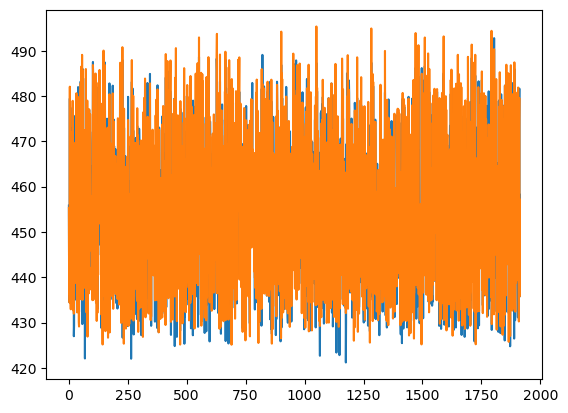

In [9]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_pred, y_test)

In [11]:
print(f'Mean Squared error {mse}')
print(f'r2_score {score}')

Mean Squared error 20.27527282195231
r2_score 0.925318326364611


In [22]:
from sklearn.feature_selection import SelectFromModel

feature_names = dataset.drop(columns=["electrical energy output"]).columns

model = SelectFromModel(regressor, prefit=True)
# X_new = model.transform(X_train)

# features = X.columns
# print("Selected Features:", features[model.get_support()])

selected_features = feature_names[model.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Ambient Temperature', 'Exhaust Vacuum', 'Ambient Pressure',
       'Relative Humidity'],
      dtype='object')
